In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
import cmocean
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from scipy.stats import linregress
import pandas as pd

In [3]:
# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/derived/clim_stl_mon_20240831.nc')
ras = file_id.variables["CHL"][:]
time = file_id.variables["time"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
file_id.close()

In [3]:
# Initialize an array to hold the slopes
# slopes = np.zeros((ras.shape[1], ras.shape[2]))  # shape (m, n)
# pvals = np.zeros((ras.shape[1], ras.shape[2]))  # shape (m, n)

# Perform linear regression for each (m, n) cell
# for i in range(ras.shape[1]):  # Loop over rows
#     for j in range(ras.shape[2]):  # Loop over columns
 #       # Perform linear regression for the (i, j) cell over time
 #       slope, intercept, r_value, p_value, std_err = linregress(time, ras[:, i, j])
 #       slopes[i, j] = slope  # Store the slope in the 2D array
 #        pvals[i, j] = p_value  # Store the slope in the 2D array

# sig_slopes = slopes
# sig_mask = pvals < 0.05
# sig_slopes[sig_mask] = 0

In [4]:
# convert to xarray. 
# ras = sig_slopes*365
# ras = xr.DataArray(ras, 
#                   coords={'x': lat, 'y':lon}, 
#                   dims=["x", "y"])
# ras = ras.clip(min = -0.0035, max = 0.001, keep_attrs=False)

# divnorm = colors.TwoSlopeNorm(vmin = np.nanmin(ras.data), vcenter = 0, vmax = np.nanmax(ras.data))

## Calculate the bounds of the data
# lon_bounds = [ras.y.min(), ras.y.max()]
# lat_bounds = [ras.x.min(), ras.x.max()]

# fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
# m = Basemap(projection='lcc', resolution='l', 
#            llcrnrlat=16, urcrnrlat=35.5, 
#            llcrnrlon=-170, urcrnrlon=-130,
#            lat_0 = 30, lon_0 = -150,
#            width=5.1E6, height=5E6)

# Convert latitude and longitude to map projection coordinates.
# x_map, y_map = np.meshgrid(ras.y, ras.x)
# x, y = m(x_map, y_map)
# Plot data.
# contour = m.contourf(x, y, ras, cmap = cmocean.cm.tarn_r, levels=100, extend='both', norm=divnorm)
# m.fillcontinents(color = 'black')
# Add grid lines
# parallels = m.drawparallels(np.arange(18, 40, 2), labels=[1,0,0,0], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5), linewidth = 0.6)
# meridians =  m.drawmeridians(np.arange(-175, -130, 3), labels=[0,0,0,1], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5),linewidth = 0.6)
# Draw parallels and meridians with customized gridline alpha and label colors
# m.drawcoastlines(color='black')
# c = ax1.contourf(ras.y, ras.x, ras, levels = 50, cmap = cmocean.cm.tarn_r, norm=divnorm) 
# cbar = fig.colorbar(c, shrink = 0.965, pad = 0.02)
# plt.savefig('../../figures/cli_slope_notsummer_stl_20240902.png', bbox_inches='tight', dpi=300)
# plt.show

In [4]:
### Subsetting just the summer. 

timedelta_vector = (time * np.timedelta64(1, 'D')).astype('timedelta64[ns]')
# Add to base date
base_date = np.datetime64('1970-01-01')
date_vector = base_date + timedelta_vector

# Convert the time vector to a Pandas datetime object
date_vec_pd = pd.to_datetime(date_vector)

# Identify the indices for the summer months (June to October)
summer_indices = (date_vec_pd.month >= 6) & (date_vec_pd.month <= 10)

# Subset the 3D array using the summer indices
ras = ras[summer_indices, :, :]
time = time[summer_indices,]
# Time vector (e.g., 10 time points)

# Initialize an array to hold the slopes
slopes = np.zeros((ras.shape[1], ras.shape[2]))  # shape (m, n)
pvals = np.zeros((ras.shape[1], ras.shape[2]))  # shape (m, n)

# Perform linear regression for each (m, n) cell
for i in range(ras.shape[1]):  # Loop over rows
    for j in range(ras.shape[2]):  # Loop over columns
        # Perform linear regression for the (i, j) cell over time
        slope, intercept, r_value, p_value, std_err = linregress(time, ras[:, i, j])
        slopes[i, j] = slope  # Store the slope in the 2D array
        pvals[i, j] = p_value  # Store the slope in the 2D array

/home/jamie/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [11]:
sig_slopes = slopes.copy()
sig_mask = pvals > 0.05
sig_slopes[sig_mask] = 0

<function matplotlib.pyplot.show(close=None, block=None)>

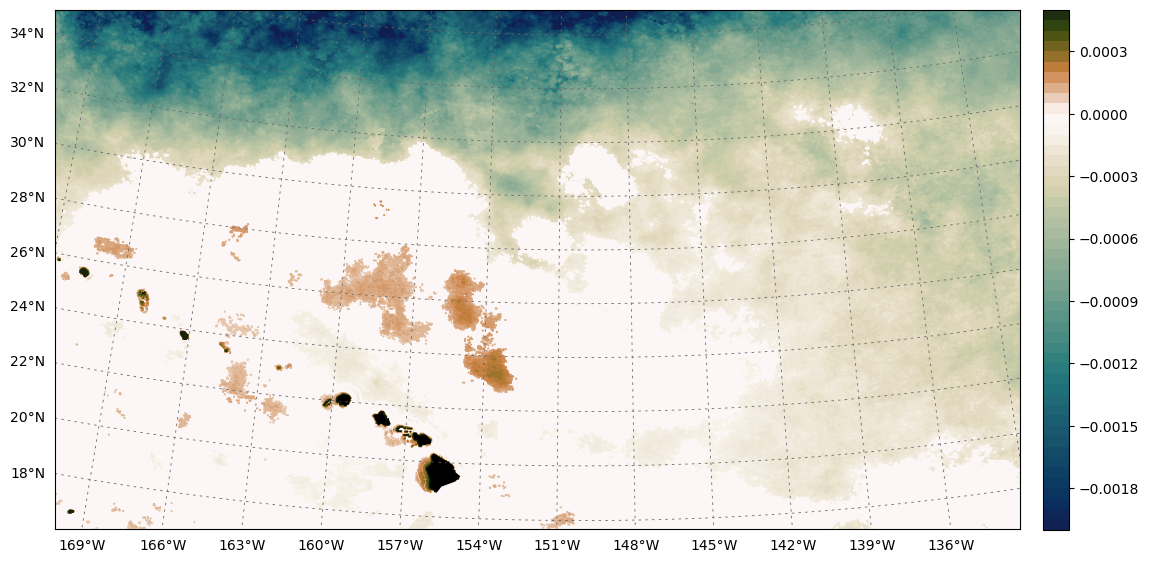

In [13]:
ras = sig_slopes*365
# convert to xarray. 
ras = xr.DataArray(ras, 
                   coords={'x': lat, 'y':lon}, 
                   dims=["x", "y"])
ras = ras.clip(min = -0.002, max = 0.0005, keep_attrs=False)

divnorm = colors.TwoSlopeNorm(vmin = np.nanmin(ras.data), vcenter = 0, vmax = np.nanmax(ras.data))

# Calculate the bounds of the data
lon_bounds = [ras.y.min(), ras.y.max()]
lat_bounds = [ras.x.min(), ras.x.max()]

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
m = Basemap(projection='lcc', resolution='l', 
            llcrnrlat=16, urcrnrlat=35.5, 
            llcrnrlon=-170, urcrnrlon=-130,
            lat_0 = 30, lon_0 = -150,
            width=5.1E6, height=5E6)

# Convert latitude and longitude to map projection coordinates.
x_map, y_map = np.meshgrid(ras.y, ras.x)
x, y = m(x_map, y_map)
# Plot data.
contour = m.contourf(x, y, ras, cmap = cmocean.cm.tarn_r, levels=100, extend='both', norm=divnorm)
m.fillcontinents(color = 'black')
# Add grid lines
parallels = m.drawparallels(np.arange(18, 40, 2), labels=[1,0,0,0], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5), linewidth = 0.6)
meridians =  m.drawmeridians(np.arange(-175, -130, 3), labels=[0,0,0,1], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5),linewidth = 0.6)
# Draw parallels and meridians with customized gridline alpha and label colors
m.drawcoastlines(color='black')
c = ax1.contourf(ras.y, ras.x, ras, levels = 50, cmap = cmocean.cm.tarn_r, norm=divnorm) 
cbar = fig.colorbar(c, shrink = 0.965, pad = 0.02)
plt.savefig('../../figures/cli_slope_sum_stl_20250320.png', bbox_inches='tight', dpi=300)
plt.show